In [1]:
# import libraries
import pandas as pd
import numpy as np

In [22]:
# import dataset
# columns = ['v1', 'v2', 'drop1', 'drop2', 'drop3']
df = pd.read_csv(r'Sources\spam.csv', encoding='latin-1') #new
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [26]:
df.drop(columns = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 2'], inplace=True)
print(df.head(5))

  target                                                sms
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [27]:
# renaming the columns
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
print(df.head(5))

  target                                                sms
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [28]:
# lable encoding the df to get 0 or 1 for target values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
print(df.head(5))

   target                                                sms
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [29]:
# analysing the dataset for the null values
print(df.isnull().sum())

target    0
sms       0
dtype: int64


In [30]:
# analysing the dataset for the duplicate values
print(df.duplicated().sum())
# removing duplicates
df.drop_duplicates(keep='first', inplace=True)
print(df.duplicated().sum())

403
0


In [31]:
# performing EDA (Exploratory Data Analyis), to better understand our dataset.

#1 counting number of words, character, and sentences
import nltk
# nltk.download('punkt')

In [32]:
df['num_chars'] = df.sms.apply(len)
df['num_words'] = df.sms.apply(lambda x: len(nltk.word_tokenize(x))) # new
df['num_sents'] = df.sms.apply(lambda x: len(nltk.sent_tokenize(x))) # new

In [33]:
print(df)
print(f"describing the newly added cols\n {df[['num_chars', 'num_words', 'num_sents']].describe()}")
print(f"describing the newly added cols for hams\n {df[df.target==0][['num_chars', 'num_words', 'num_sents']].describe()}") # new
print(f"describing the newly added cols for spams\n {df[df.target==1][['num_chars', 'num_words', 'num_sents']].describe()}") # new

      target                                                sms  num_chars  \
0          0  Go until jurong point, crazy.. Available only ...        111   
1          0                      Ok lar... Joking wif u oni...         29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...        155   
3          0  U dun say so early hor... U c already then say...         49   
4          0  Nah I don't think he goes to usf, he lives aro...         61   
...      ...                                                ...        ...   
5567       1  This is the 2nd time we have tried 2 contact u...        161   
5568       0              Will Ì_ b going to esplanade fr home?         37   
5569       0  Pity, * was in mood for that. So...any other s...         57   
5570       0  The guy did some bitching but I acted like i'd...        125   
5571       0                         Rofl. Its true to its name         26   

      num_words  num_sents  
0            24          2  
1    

In [34]:
# analysing the stats with the help of graphs
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_chars', ylabel='Count'>

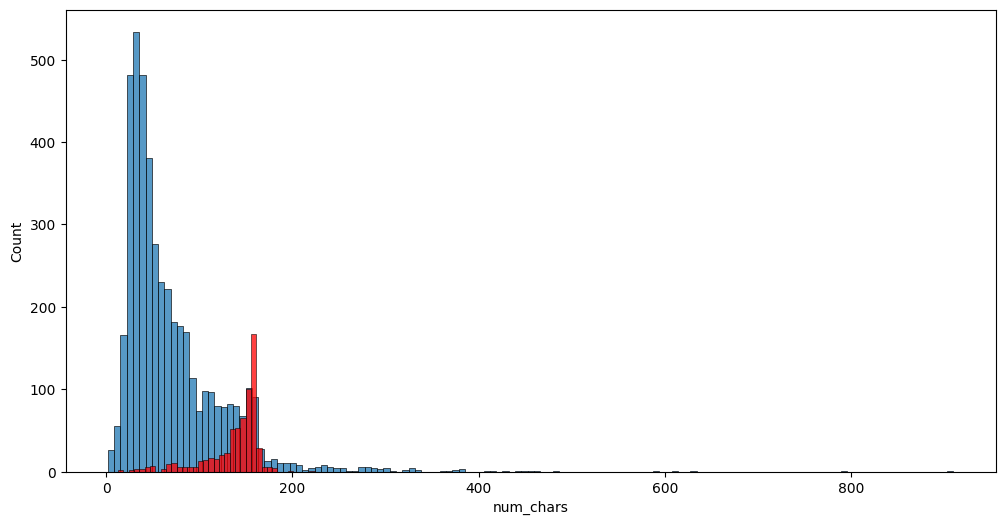

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target == 0]['num_chars']) # ham
sns.histplot(df[df.target == 1]['num_chars'], color='red') # spam

In [17]:
# observation: For spam messages number of characters used are more than number of characters used for ham

<Axes: xlabel='num_words', ylabel='Count'>

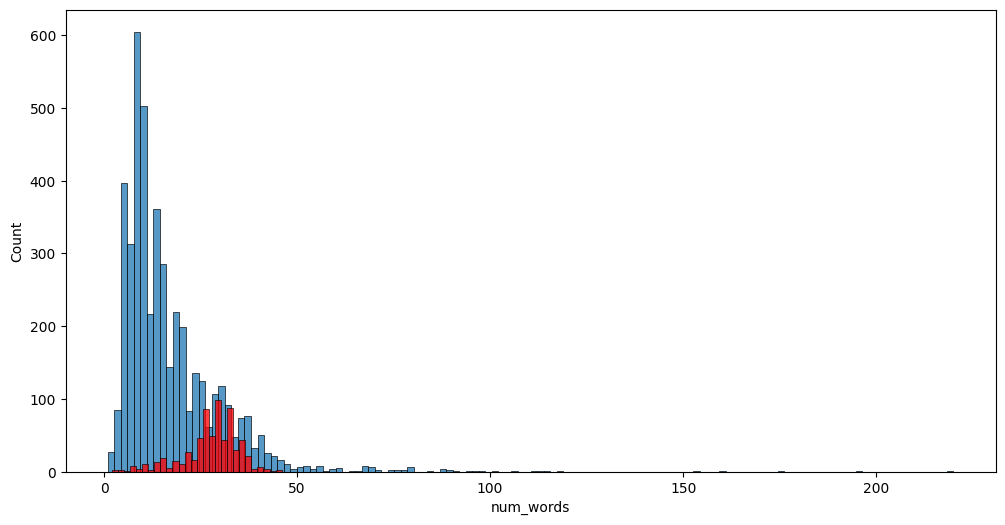

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target == 0]['num_words']) # ham
sns.histplot(df[df.target == 1]['num_words'], color='red') # spam

<Axes: xlabel='num_sents', ylabel='Count'>

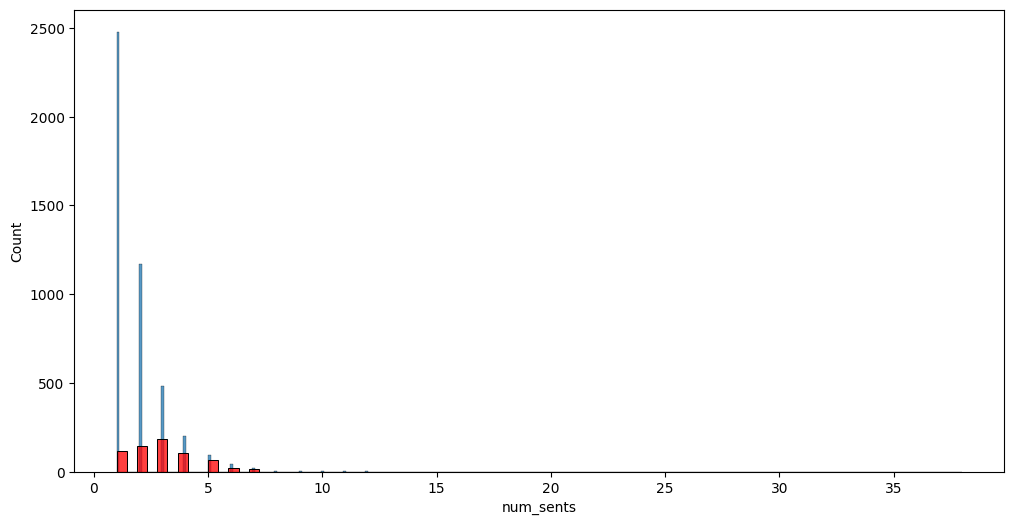

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target == 0]['num_sents']) # ham
sns.histplot(df[df.target == 1]['num_sents'], color='red') # spam

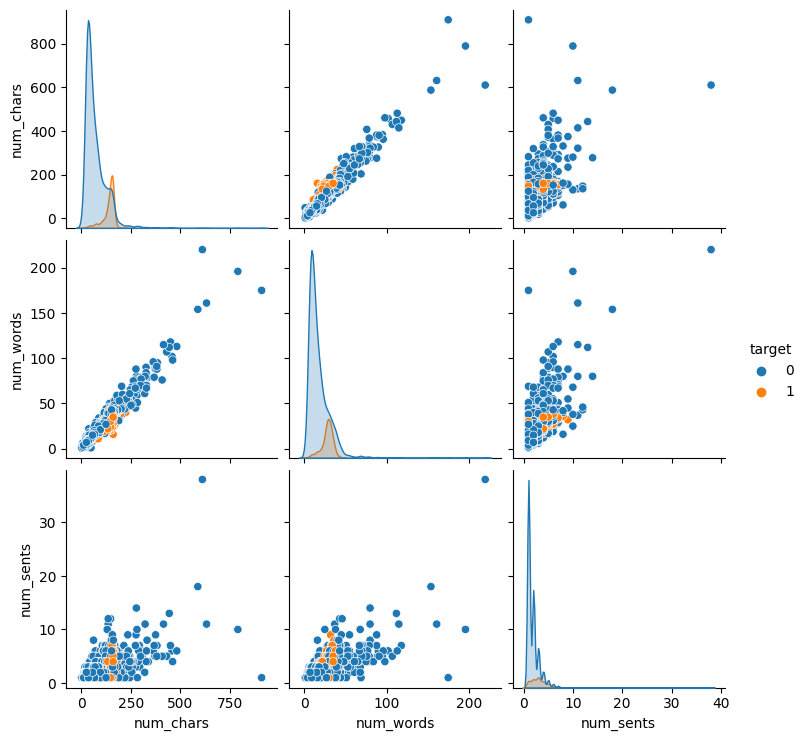

In [38]:
# checking relationship between num words and num chars
sns.pairplot(df, hue='target')

In [39]:
# observations: data has some outliers other than that it  looks linear relation i.e. if num_Chars directly propostional to 
# num_words which is directly proportional to num_sents.

In [40]:
# calculating correlation coefficient
df.corr() # new

C:\Users\AxelShivam\AppData\Local\Temp\ipykernel_4932\4237519514.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_chars,num_words,num_sents
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sents,0.263939,0.624139,0.679971,1.000000


C:\Users\AxelShivam\AppData\Local\Temp\ipykernel_4932\1432187131.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

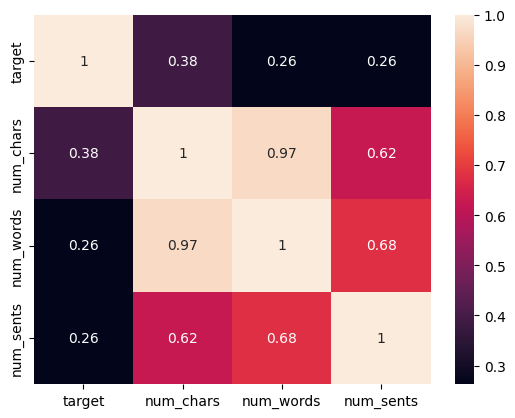

In [41]:
# using heat maps
sns.heatmap(df.corr(), annot=True) # new

In [42]:
# observation: we can see that there is co-relation among the values in df. But corelation among target and num_char is highest when compared to other counts.

In [43]:
## Analysis to see what are the most used words in spam messages.

# Data Preprocessing (Text)
1. Lowercase
2. Tokenization
3. Removing special characters.
4. Removing Stopwards and punctuation
5. Stemming




In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp = []
    for i in text:
        if i.alnum():
            temp.append(i)
    return temp
            

In [48]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\AxelShivam/nltk_data'
    - 'C:\\Users\\AxelShivam\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'C:\\Users\\AxelShivam\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'C:\\Users\\AxelShivam\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\AxelShivam\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
